# Assignment 2 - Machine Learning Basics

## *Yuan Feng*
Netid:  *yf115*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

Would flexible learning method be better or worse?
“Flexibility” is a property of a statistical learning method. It is a measure of how much a fitted model can vary with a given train data. The more the flexible the model is, the better it can fit the train data.

1. Better. A flexible model is more suitable for this situation. With a extremely large sample size and small number of predictors. A more sophisticated model will help explore the relationships of the data. 


2. Worse. An inflexible model is the optimal choice. With extremely large number of predictors, the problem od over-fitting may arise and an inflexible will help improve model performance.


3. Better.  A flexible model should be chosen in this example. Therefore the highly non-linear relatonship could be captured by a more advanced model.


4. Worse. An inflexible model would be more suitable in this case. Since the variance of the term is high, a complex model is very likely to capture the relationship of the errors instead of the true relationship.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

1. This is a regression problem, in which inference of CEO salary is the topic of interest. The sample size is 500 and number of predictors is 3 (profit, number of employees in the company and type of industry).


2. This is a classification problem, in which the prediction is the main interest. The sample size is 20 and the number of predictors is 13 (price charged for the product, marketing budget, competition price and ten other).


3. This is a regression problem with prediction being the main interest. The sample size is 52 (number of weeks in 2012) and the number of predictors is 4 (% change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market).

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

In [39]:
#(a)
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])

y = np.array(['r','r','r','b','b','r'])

Z=np.zeros((6,3))


distance = np.sqrt(np.sum((X - Z)**2, axis = 1))
distance


array([3.        , 2.        , 3.16227766, 2.23606798, 1.41421356,
       1.73205081])


*Table 2. The Euclidean Distance between each Observation and the Test point*

| Obs. | $Distance$ | $y$ |
|------|-------|-------|
| **1**| 3     | Red     |
| **2**| 2     | Red     |
| **3**| 3.162     | Red     |
| **4**| 2.236     | Blue    |
| **5**| 1.414    | Blue   |
| **6**| 1.732     | Red    |

In [30]:
#(b)
from sklearn.neighbors import KNeighborsClassifier

b = KNeighborsClassifier(n_neighbors=1)
b.fit(X, y)
b_predict = b.predict(np.array([0,0,0]).reshape(1,3))
print(b_predict)

['b']


**(b)** 
Our prediction with $K=1$ is Blue. With $K = 1$, the test point is identified as the category of point 5, since the Euclidean distance of point 5 is the smallest.

In [32]:
#(c)
from sklearn.neighbors import KNeighborsClassifier

c = KNeighborsClassifier(n_neighbors=3)
c.fit(X, y)
c_predict = c.predict(np.array([0,0,0]).reshape(1,3))
print(c_predict)

['r']


**(c)** 

Our prediction with $K=3$ is Red. When $K = 3$ is the case, the test point is identified as the category of point 2,5 and 6. This is because sum of their Euclidean distance is the smallest. With Red being the majority of classifications of this group, the test point is classified as red as well.

**(d)** 

We would expect the *best* value of $K$ to be small because small $K$ will yield more smooth curves, which could better capture the trend shown in the highly nonlinear training dataset.

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [6]:
# (a) Write your own kNN classifier
import numpy as np

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.X_train = None
        self.y_train = None
    
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.X_train = x
        self.y_train = y

    
    def predict(self, x, k): 
        
        y_hat = []
        
        for i in x:
            
            distances = [np.sqrt(np.sum((j - i)**2)) for j in self.X_train] 
        
            nearest = np.argsort(distances)
        
            topK = [self.y_train[i] for i in nearest[:k]]
            
            result = 1 if np.sum(topK)>= k/2 else 0
            
            y_hat.append(result)
        
           

        return y_hat

    
# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [7]:
# (b) import data
x_train_high = np.loadtxt("A2_X_train_high.csv", delimiter=',')
y_train_high = np.loadtxt("A2_y_train_high.csv", delimiter=',')
x_train_low = np.loadtxt("A2_X_train_low.csv", delimiter=',')
y_train_low = np.loadtxt("A2_y_train_low.csv", delimiter=',')

x_test_high = np.loadtxt("A2_X_test_high.csv", delimiter=',')
y_test_high = np.loadtxt("A2_y_test_high.csv", delimiter=',')
x_test_low = np.loadtxt("A2_X_test_low.csv", delimiter=',')
y_test_low = np.loadtxt("A2_y_test_low.csv", delimiter=',')

In [8]:
# (c) train classifier
import time
k = 5
begin_low = time.time()
low = Knn()
low.fit(x_train_low, y_train_low)
low_y = low.predict(x_test_low, k)
end_low = time.time()
print("Low dimension precision is", accuracy(y_test_low, low_y))
print("Time usage : %.4f s" % (end_low - begin_low))

begin_high = time.time()
high = Knn()
high.fit(x_train_high,y_train_high)
high_y = high.predict(x_test_high,k)
end_high = time.time()
print("High dimension precision is", accuracy(y_test_high, high_y))
print("Time usage : %.4f s" % (end_high - begin_high))


Low dimension precision is 0.925
Time usage : 8.6524 s
High dimension precision is 0.993
Time usage : 8.4015 s


In [9]:
#(d)accuracy and time usage comparision

from sklearn.neighbors import KNeighborsClassifier

begin_low = time.time()

knn_low =  KNeighborsClassifier(n_neighbors=5)
knn_low.fit(x_train_low, y_train_low)
end_low = time.time()

print("Low dimension precision is", knn_low.score(x_test_low, y_test_low))
print("Time usage : %.4f s" % (end_low - begin_low))


begin_high = time.time()
knn_high =  KNeighborsClassifier(n_neighbors=5)
knn_high.fit(x_train_high,y_train_high)
end_high = time.time()

print("High dimension precision is", knn_high.score(x_test_high, y_test_high))
print("Time usage : %.4f s" % (end_high - begin_high))

Low dimension precision is 0.925
Time usage : 0.0029 s
High dimension precision is 0.993
Time usage : 0.0042 s


**(e)**

The drawbacks of the prediction process being slow could impact deals or transactions relying on real-time decision making. The change in rate in stock markets or auction, for example, are highly subjected to fast and accurate decsion making process to secure a profitable deal. This could be one of the reason why prediction being fast is of high importance.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [41]:
#(a) create synthetic dataset
from sklearn import datasets
import numpy as np
from plotnine import *
import sklearn
np.random.seed(1)
x, y  = sklearn.datasets.make_moons(1000, noise=0.35)

x1 = x[:,0]
x2 = x[:,1]

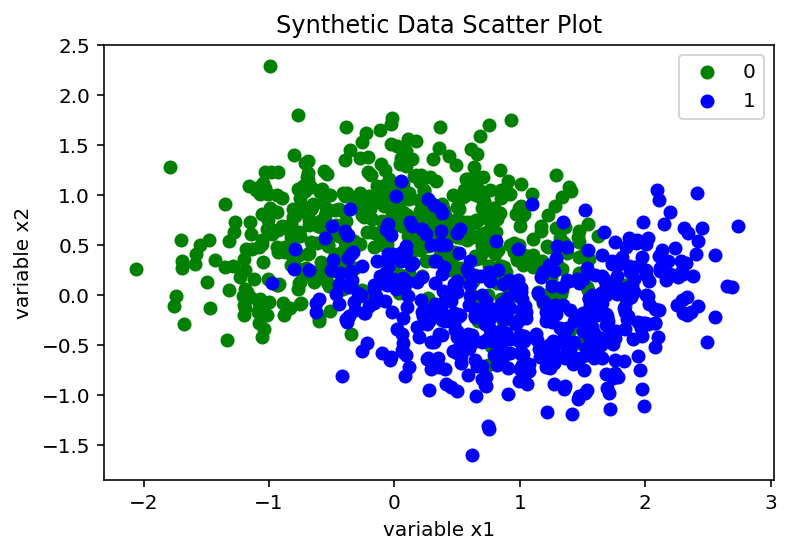

In [42]:
#(b) scatterplot the random sample created
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt


plt.scatter(x1[y == 0], x2[y == 0], c='g',label = '0')
plt.scatter(x1[y == 1], x2[y == 1], c='b',label = '1')

plt.title("Synthetic Data Scatter Plot")
plt.xlabel("variable x1")
plt.ylabel("variable x2")
plt.legend()
plt.show()

In [49]:
#(c)
a1 = np.random.choice(1000, 100)
a2 = np.random.choice(1000, 100)
a3 = np.random.choice(1000, 100)
np.random.seed(1)
x1 = x[a1]
y1 = y[a1]
x11 = x1[:,0]
x12 = x1[:,1]

x2 = x[a2]
y2 = y[a2]
x21 = x2[:,0]
x22 = x2[:,1]

x3 = x[a3]
y3 = y[a3]
x31 = x3[:,0]
x32 = x3[:,1]

def knn_model(x,y,k):
    knn = KNeighborsClassifier(n_neighbors=k)
    k_model = knn.fit(x, y)
    return k_model

knn1 = knn_model(x1,y1,1)
knn2 = knn_model(x2,y2,1)
knn3 = knn_model(x3,y3,1)
knn4 = knn_model(x1,y1,25)
knn5 = knn_model(x2,y2,25)
knn6 = knn_model(x3,y3,25)
knn7 = knn_model(x1,y1,50)
knn8 = knn_model(x2,y2,50)
knn9 = knn_model(x3,y3,50)

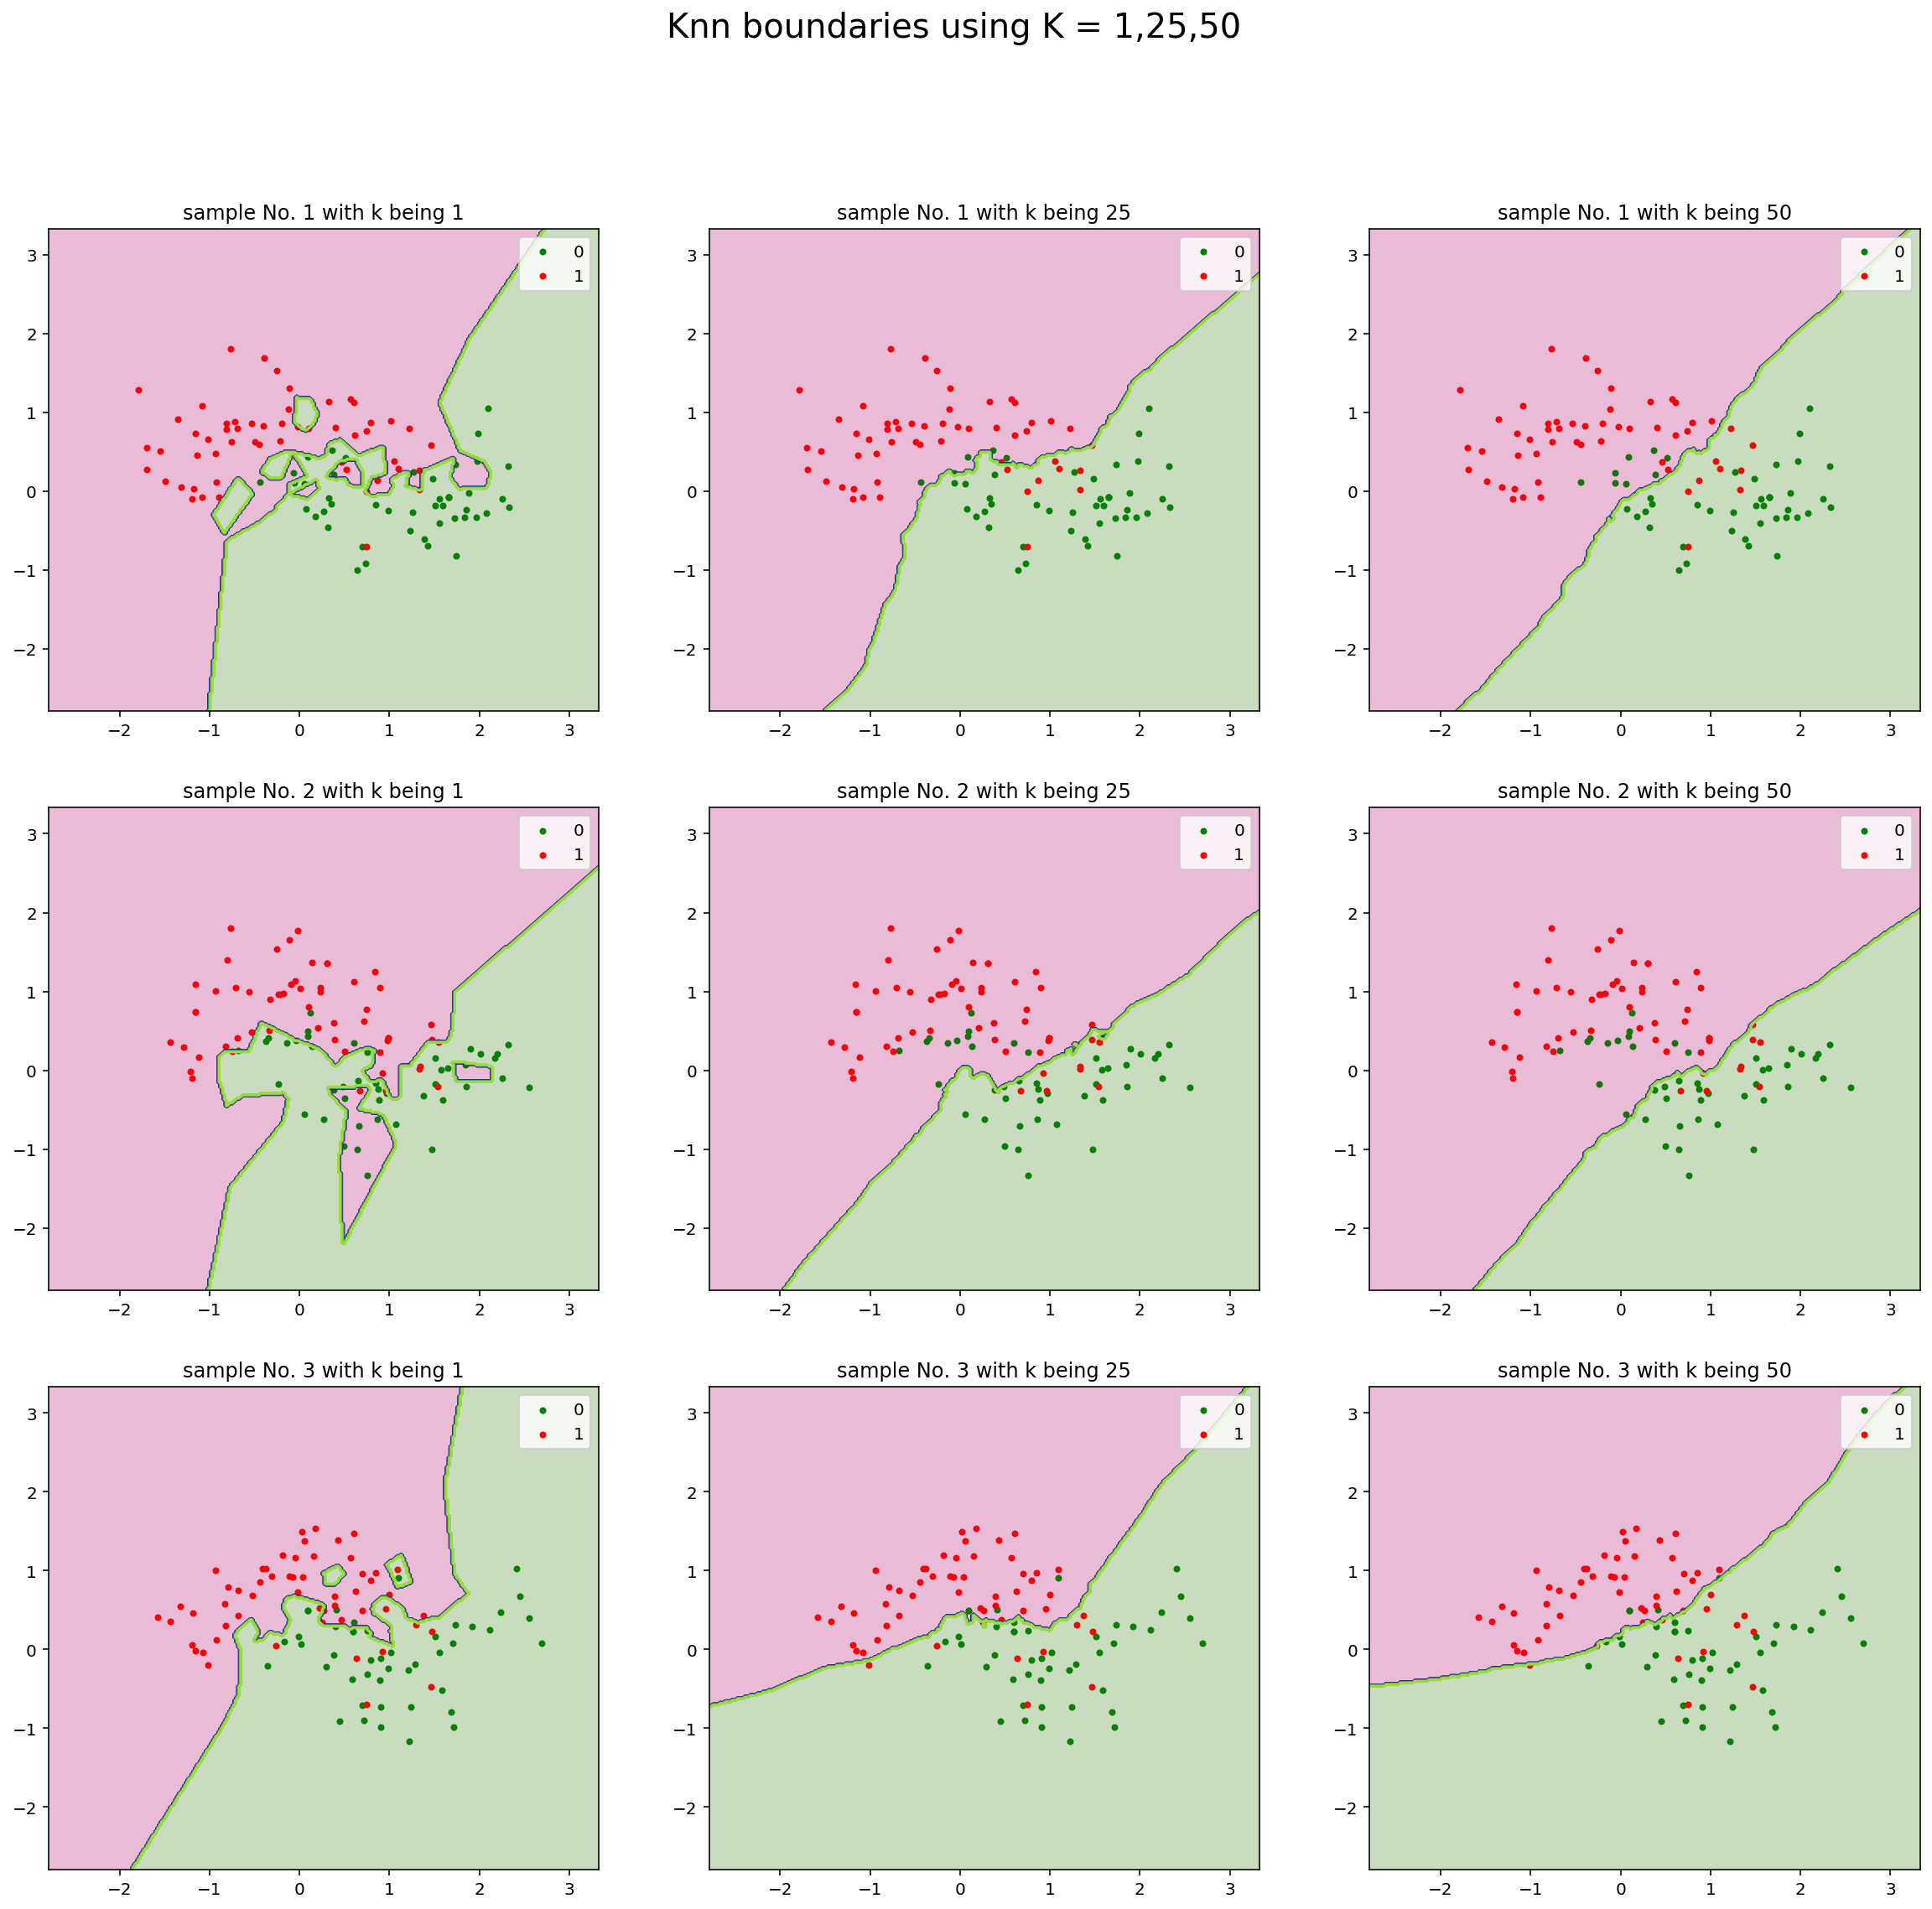

In [50]:
#(d)
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import cm

np.random.seed(1)


a1 = np.random.choice(1000, 100)
a2 = np.random.choice(1000, 100)
a3 = np.random.choice(1000, 100)

x1 = x[a1]
y1 = y[a1]
x11 = x1[:,0]
x12 = x1[:,1]

x2 = x[a2]
y2 = y[a2]
x21 = x2[:,0]
x22 = x2[:,1]

x3 = x[a3]
y3 = y[a3]
x31 = x3[:,0]
x32 = x3[:,1]
    
h = .02
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(x_min, x_max, h))
    

def plot(no, knn, xx, yy, x, x1, x2, y, s, k):
    
    #knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(x, y)
    x_coord = np.stack((xx.flatten(), yy.flatten()), axis = 1)
    y_coord = knn.predict(x_coord)
    y_coord = y_coord.reshape(len(xx),len(yy))
    
    no.contour(xx,yy,y_coord)
    no.contourf(xx, yy, y_coord, cmap=cm.PiYG,alpha = 0.2)
    
    no.scatter(x1[np.where(y == 1)], x2[np.where(y == 1)], marker='.', label = '0', c='green')
    no.scatter(x1[np.where(y == 0)], x2[np.where(y == 0)] , marker='.', label = '1', c='red')
    no.legend()
    
    no.contour(xx,yy,y_coord)
    no.contourf(xx, yy, y_coord, cmap=cm.PiYG,alpha = 0.1)
    
    no.set_title("sample No. %d with k being %d" % (s, k))
    

      

fig, axs = plt.subplots(3, 3, figsize = (20, 18))
fig.suptitle("Knn boundaries using K = 1,25,50", fontsize = 20)
plot(axs[0,0],knn1,xx,yy,x1, x11, x12, y1, 1, 1)
plot(axs[1,0],knn2,xx,yy,x2, x21, x22, y2, 2, 1)
plot(axs[2,0],knn3,xx,yy,x3, x31, x32, y3, 3, 1)
plot(axs[0,1],knn4,xx,yy,x1, x11, x12, y1, 1, 25)
plot(axs[1,1],knn5,xx,yy,x2, x21, x22, y2, 2, 25)
plot(axs[2,1],knn6,xx,yy,x3, x31, x32, y3, 3, 25)
plot(axs[0,2],knn7,xx,yy,x1, x11, x12, y1, 1, 50)
plot(axs[1,2],knn8,xx,yy,x2, x21, x22, y2, 2, 50)
plot(axs[2,2],knn9,xx,yy,x3, x31, x32, y3, 3, 50)




plt.show()



**(e)**

The smaller the value of K, the more difference is observed within each column. The bigger the value of K, the smoother the decision boundary is. When $K=25$, the boundary seems to be the optimal for the generated dataset. The most varied boundary is occurred when $K=1$.

**(f)**

The bias-variance tradeoff means that with a more flexible model, we are better able to capture the more subtle relationships in the training dataset and have lower bias, but will result in a higher variance in the test dataset due to overfitting. If we apply an inflexible model, the model bias may be higher, failing to capture certain features of the training dataset but will yield a lower variance instead with a more stable performance on the test dataset. As is shown in the plot above, column 1 with $K=1$ has the most differentiated plots of all three (high variance and low bias) while column 3 with $K=50$ shows the most similar set of plots (high bias and low variance).


## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [51]:
#(a)
import sklearn
import numpy as np
from sklearn import datasets

np.random.seed(2)
x_test,y_test = sklearn.datasets.make_moons(1000)

In [55]:
#(b)
from sklearn.neighbors import KNeighborsClassifier

k = np.arange(1,501,1)
test_error_values = []
train_error_values = []
for i in k:
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x,y)
    y_hat_test = knn.predict(x_test)
    y_hat_train= knn.predict(x)
    error_test = 1 - accuracy(y_test,y_hat_test)
    error_train = 1 - accuracy(y,y_hat_train)
    test_error_values.append(error_test)
    train_error_values.append(error_train)



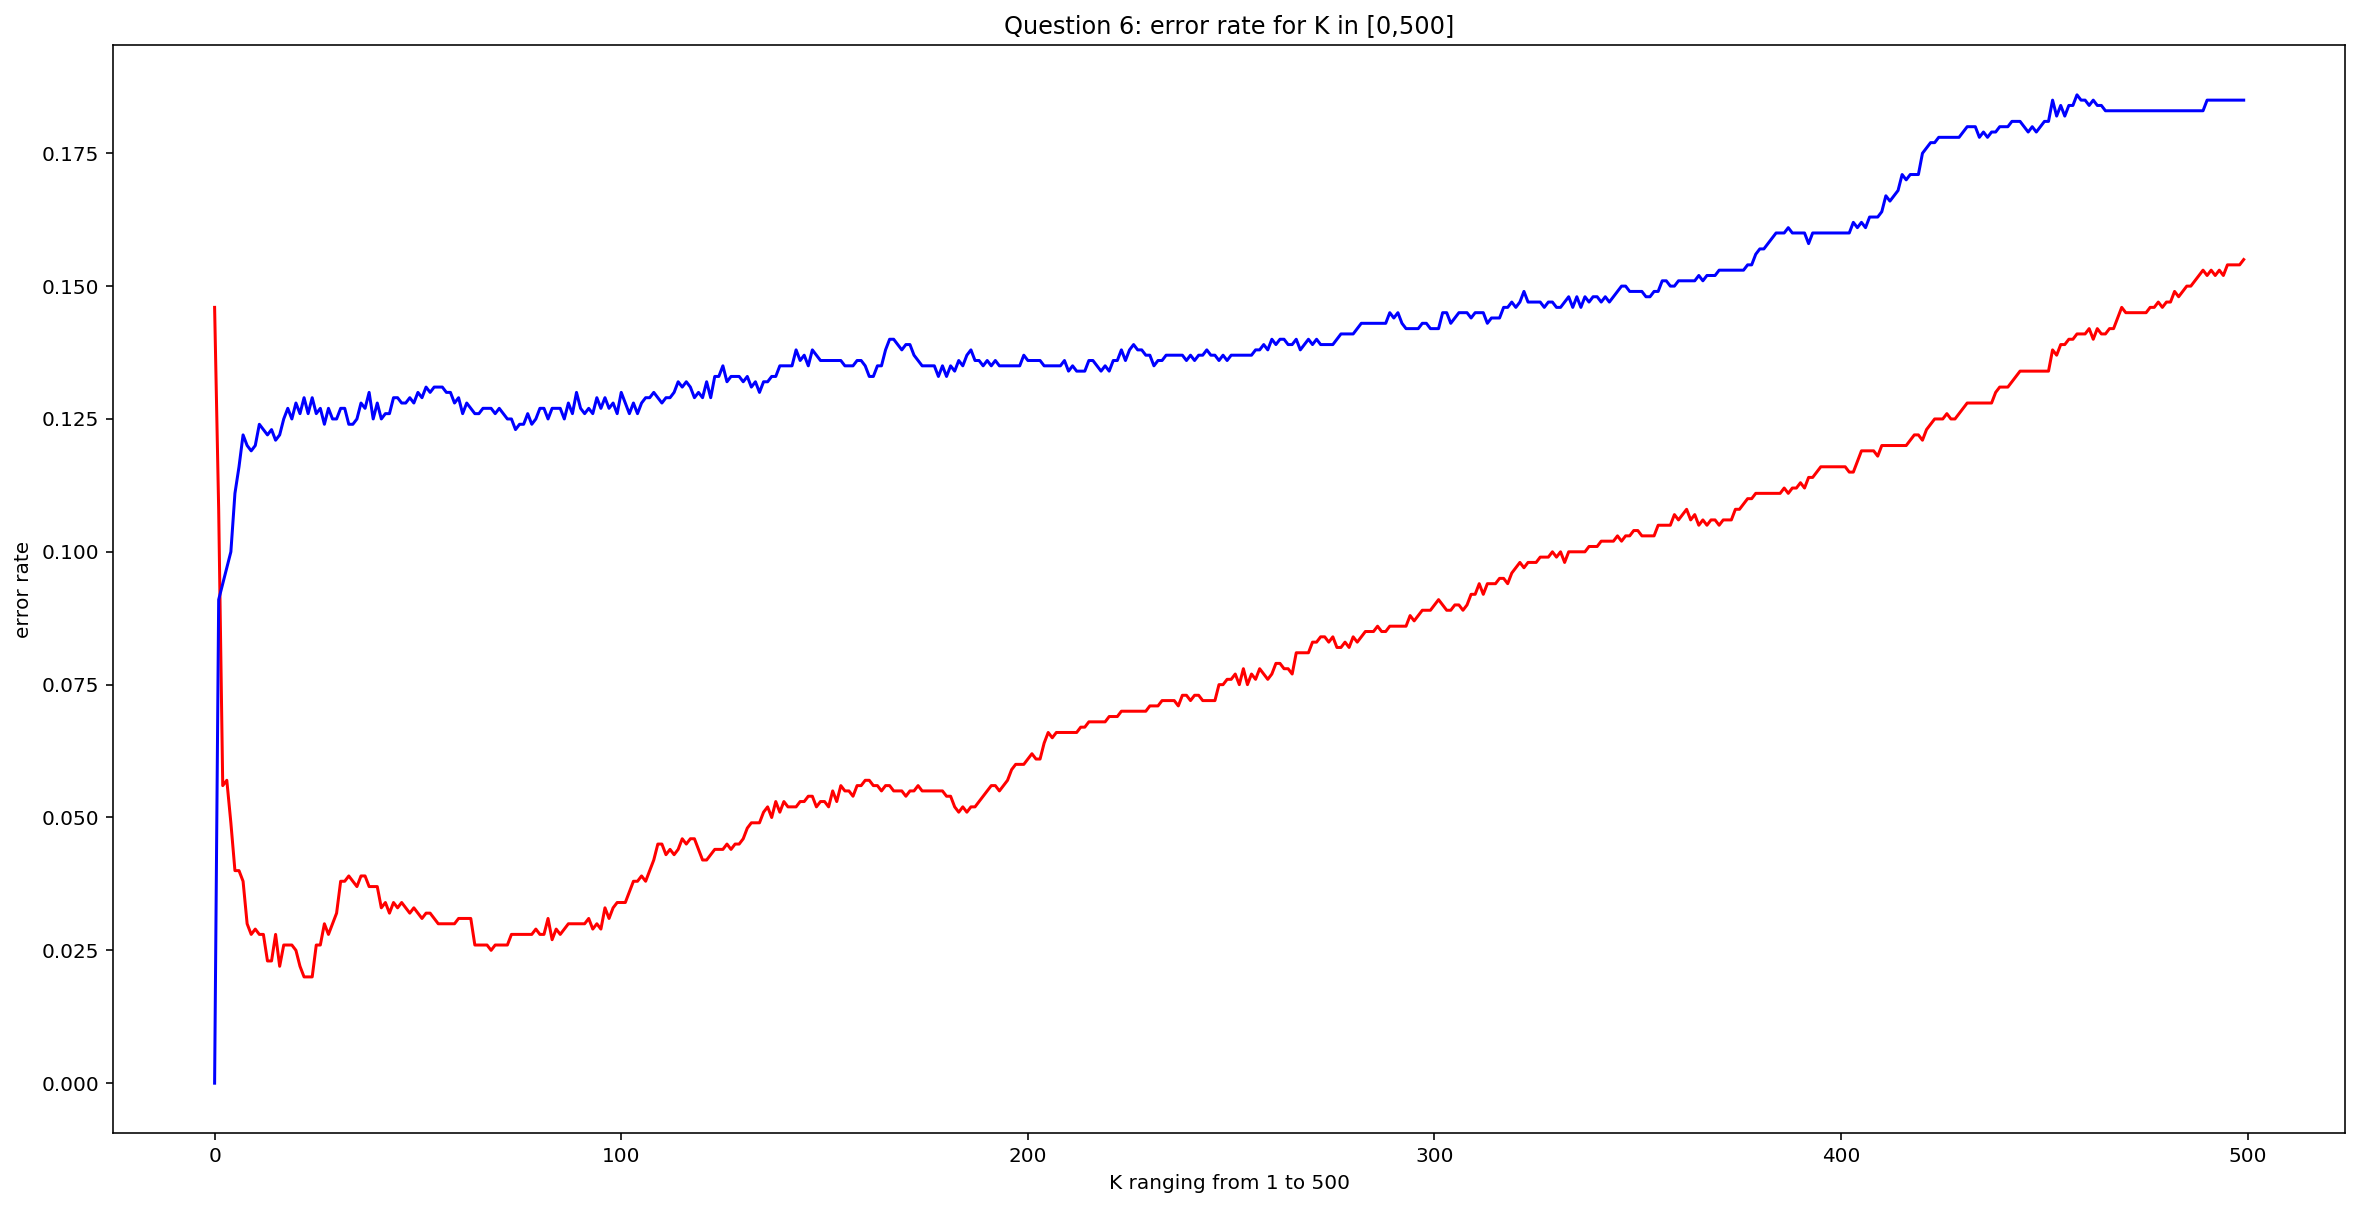

In [56]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20, 10))

plt.plot(test_error_values,color = 'red')
plt.plot(train_error_values,color = 'blue')
plt.xlabel("K ranging from 1 to 500")
plt.ylabel("error rate")
plt.title("Question 6: error rate for K in [0,500]")

plt.show()

**(c)**

It could be observed from the results that error rate dereases when the values of $K$ increases, but then goes up as $K$ continues to increase, suggesting an overfitting to the training dataset due to an over flexible model.

**(d)**

A low value of $K$ represents high variance and low bias, meaning the model could capture more detailed relationships in the training set but will possibily lead to over-fitting on the test dataet. A high value of $K$ represents low variance and high bias, which means only the more general relationships are captured in the training set. Model may not be most accurate on the training set but will yield more stable results using test dataset.


**(e)**

In [58]:
optimal = error_values.index(min(error_values))+1

print("The minimal error is",min(error_values).round(3))
print("The corresponding K values is",optimal)

The minimal error is 0.02
The corresponding K values is 23


The optimal $K$ value is the one that outputs the minimal error. The optimal $K$ in this case is 23 with a minimal error rate of 0.02.

**(f)**

The parameters that control the flexibility in other models may include: 

The parameters in linear models;

Choosing alpha in ridge/lasson models;

The numbers of leaves in hierarchial clusterings.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

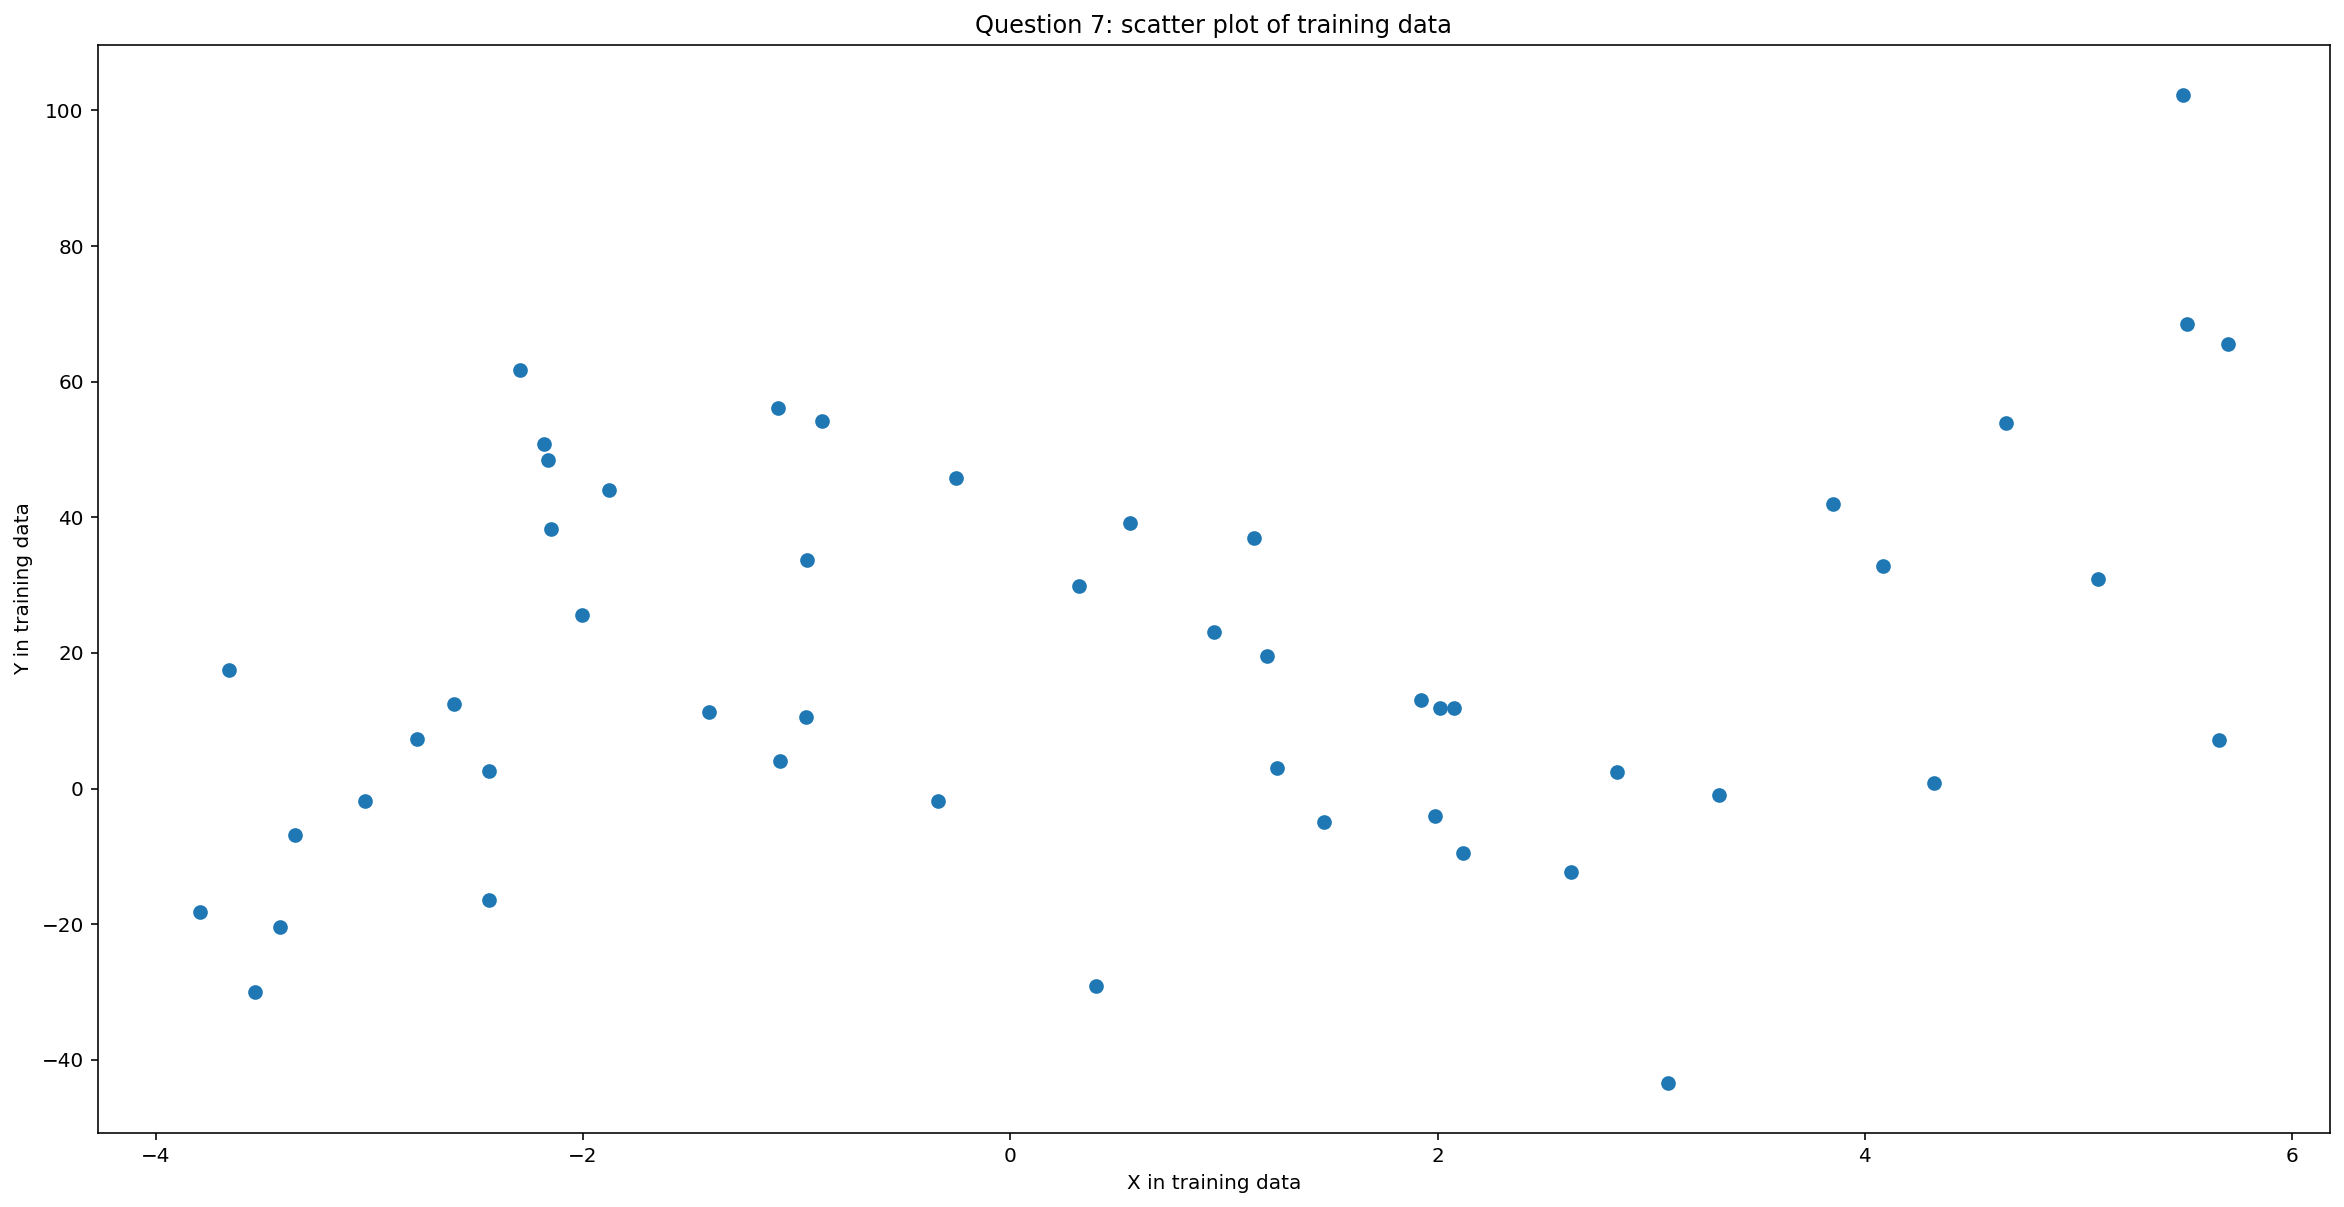

In [19]:
#(a)
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x_7train = pd.read_csv('A2_Q7_train.csv')
x_7test = pd.read_csv("A2_Q7_test.csv")

fig = plt.figure(figsize = (20, 10))
plt.scatter(x_7train["x"],x_7train['y'],s=40)
plt.xlabel("X in training data")
plt.ylabel("Y in training data")
plt.title("Question 7: scatter plot of training data")
plt.show()

In [36]:
#(b)
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

train_x = x_7train['x']
train_y = x_7train['y']
test_x = x_7test['x']
test_y = x_7test['y']
train_x = np.expand_dims(train_x, 1)

linear_model.fit(train_x, train_y)


print("The r-squared value of the model is %.4f" % linear_model.score(train_x,train_y))


mse_train = np.mean(np.absolute((linear_model.predict(train_x)-train_y)**2))

print("The MSE of this model is", mse_train.round(4))

print("The equation of the estimated model is \nY = %f + %f * X" % (linear_model.intercept_, linear_model.coef_))
 

The r-squared value of the model is 0.0649
The MSE of this model is 791.4167
The equation of the estimated model is 
Y = 17.204928 + 2.590728 * X


In [29]:
#(c）
def linear(transform,train_y):

    model = LinearRegression().fit(transform1, train_y)
    #print("The equation of the estimated model is \nY = %f + %f * X + %f * %s(X)" % ( model.intercept_, model.coef_[0], model.coef_[1]))
    print("The r-squared value of the model is %.4f" % model.score(transform, train_y))
    mse = np.mean(np.absolute((model.predict(transform)-train_y)**2))
    print("The mse of the estimated model is ",mse.round(4))
 
    
    


print("="*30 + " cos tranformation " + "="*30)
transform1 = np.c_[train_x, np.cos(train_x)]
linear(transform1,train_y)

print("="*30 + " sin tranformation " + "="*30)
transform2 = np.c_[train_x, np.sin(train_x)]
linear(transform2,train_y)

print("="*30 + " tan tranformation " + "="*30)
transform3 = np.c_[train_x, np.tan(train_x)]
linear(transform3,train_y)

print("="*30 + " X squared tranformation " + "="*30)
transform4 = np.c_[train_x, train_x**2]
linear(transform4,train_y)

print("="*30 + " X^3 tranformation " + "="*30)
transform5 = np.c_[train_x,train_x**3 ]
linear(transform5,train_y)


print("="*30 + " X^4 tranformation " + "="*30)
transform6 = np.c_[train_x,train_x**4 ]
linear(transform6,train_y)

print("="*30 + " 1/X tranformation " + "="*30)
transform7 = np.c_[train_x,1/train_x ]
linear(transform7,train_y)


print("="*48 + " The final model " + "="*48)
transform8 = np.c_[train_x, train_x**2,train_x**3]
model = LinearRegression().fit(transform8, train_y)
print("The equation of the estimated model is \nY = %f + %f * X  +%f * X^^2+ %f * X^^3" % ( model.intercept_, model.coef_[0], model.coef_[1] , model.coef_[2]))
print("The r-squared value of the model is %.4f" % model.score(transform8, train_y))
mse_final = np.mean(np.absolute((model.predict(transform8)-train_y)**2))
print("The mse of the estimated model is ",mse_final.round(4))


============================== cos tranformation ==============================
The r-squared value of the model is 0.1922
The mse of the estimated model is  683.631
============================== sin tranformation ==============================
The r-squared value of the model is -0.4631
The mse of the estimated model is  1238.2267
============================== tan tranformation ==============================
The r-squared value of the model is -3.4017
The mse of the estimated model is  3725.227
============================== X squared tranformation ==============================
The r-squared value of the model is -45.1755
The mse of the estimated model is  39078.7933
============================== X^3 tranformation ==============================
The r-squared value of the model is -1095.0750
The mse of the estimated model is  927618.6007
============================== X^4 tranformation ==============================
The r-squared value of the model is -30393.7876
The mse of the est

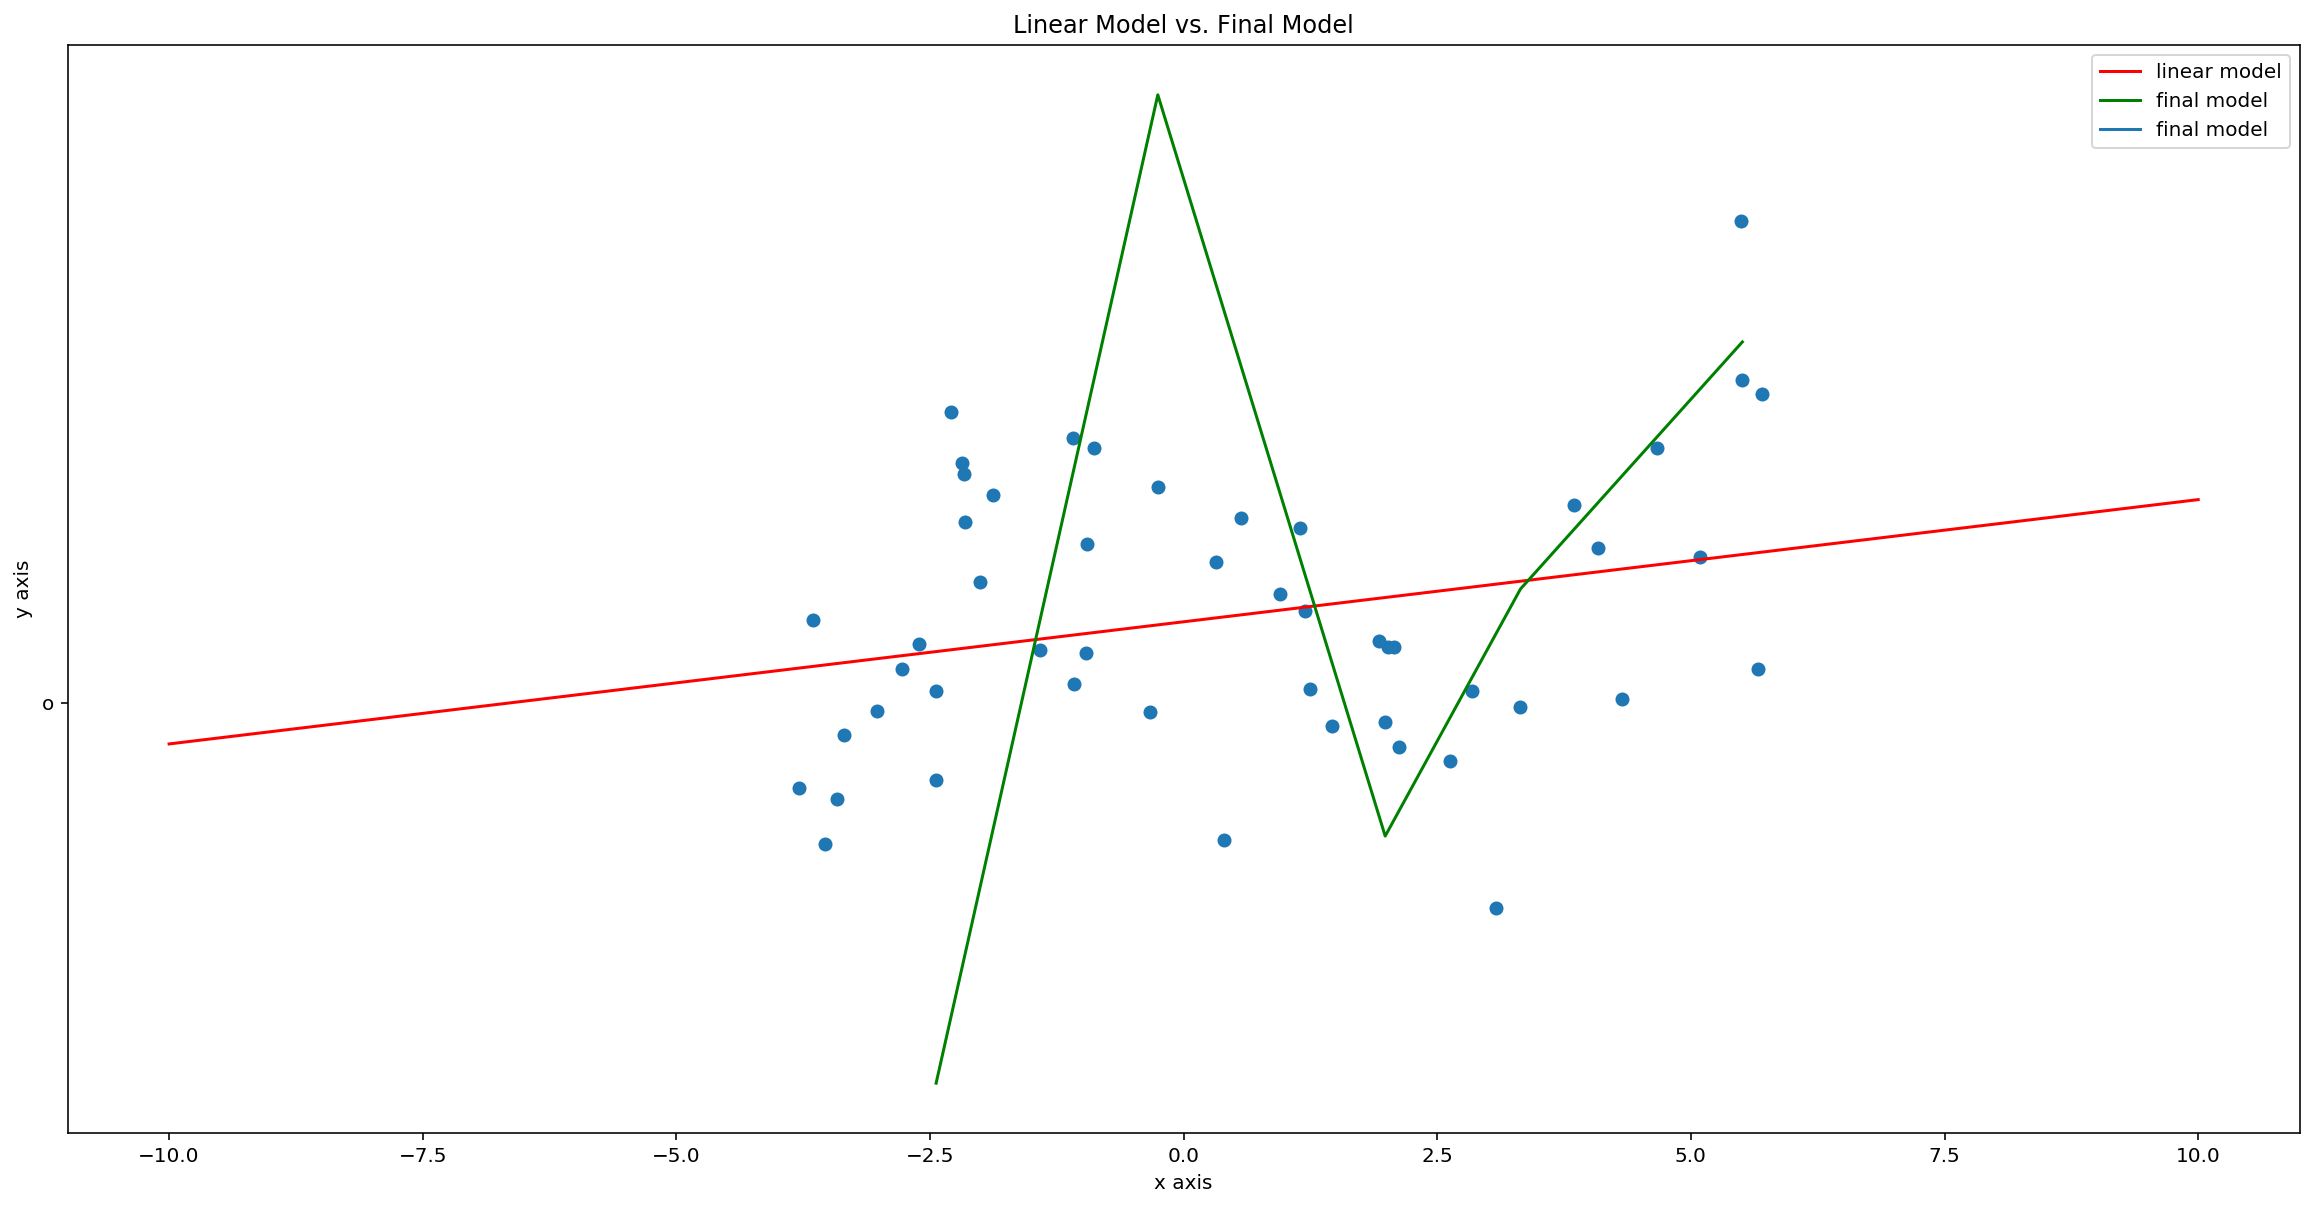

In [22]:
#(d)
grid = np.linspace(-10, 10, 10).reshape(10,1)
grid0= np.linspace(-10, 10, 5).reshape(5,1)
grid2 = np.c_[grid0,grid0,grid0]

fig = plt.figure(figsize = (20, 10))


plt.scatter(train_x, train_y)

linear_y_hat = linear_model.predict(grid)

plt.plot(grid, linear_y_hat, '-r', label = "linear model")



final_y_hat = model.predict(grid2)
mapped_x, mapped_y = zip(*sorted(zip(train_x,final_y_hat)))

plt.plot(mapped_x, mapped_y, '-g','o', label = "final model")


plt.title("Linear Model vs. Final Model")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.show()


**(e)**

In [37]:
print("="*20 + " The linear model on test data" + "="*20)
test_x = np.expand_dims(test_x, 1)
print("The r-squared value of the model is %.4f" % linear_model.score(test_x, test_y))
print("The MSE of this model is", np.mean(np.absolute((linear_model.predict(test_x)-test_y)**2)).round(4))

transform_test = np.c_[test_x, test_x**2,test_x**3]
print("="*20 + " The final model on test data " + "="*20)
print("The r-squared value of the model is %.4f" % model.score(transform_test, test_y))
print("The mse of the estimated model is ",np.mean(np.absolute((model.predict(transform_test)-test_y)**2)).round(4))

==================== The linear model on test data====================
The r-squared value of the model is -0.1329
The MSE of this model is 1116.6632
==================== The final model on test data ====================
The r-squared value of the model is 0.2295
The mse of the estimated model is  759.5031


**(f)**

In [30]:
print("="*40 + " The linear model on train data" + "="*40)
print("The r-squared value of the model is %.4f" % linear_model.score(train_x, x_7train['y']))
print("The MSE of this model is", mse_train.round(4))
print("="*40 + " The final model on train data " + "="*40)
print("The r-squared value of the model is %.4f" % model.score(transform8, train_y))
print("The mse of the estimated model is ",mse_final.round(4))

======================================== The linear model on train data========================================
The r-squared value of the model is 0.0649
The MSE of this model is 791.4167
======================================== The final model on train data ========================================
The r-squared value of the model is 0.3963
The mse of the estimated model is  510.885


The final model with higher flexibility performs better on both the training and test dataset. This is due to a more complex model that could capture detailed relationships shown in the traing dataset, which is coherent with the trends in the test dataset.

**(g)**

If the test data were significantly different from the training dataset. There is a big chance that a highly complex and flexible model would overfit on the training dataset and yield worsened performance on the test dataset.